# 輪郭: 初めの一歩

## 輪郭とは何か？

輪郭とは、同じ色や値を持つ(境界線に沿った)連続する点をつなげて形成される曲線のことと言うことができる．形状解析や物体追跡，物体認識で役に立つツールである．

精度よく輪郭を検出するために，二値画像を使う．そのため，まず初めに閾値処理やCannyのエッジ検出などにより二値画像を取得する．
cv2.findContours() 関数は入力画像を変える処理である．輪郭検出後の処理で入力画像を使用する必要がある場合は，別の変数に予めコピーしておくこと．
OpenCVの輪郭検出は，黒い背景から白い物体の輪郭を検出することと仮定している．物体は白(明るい色)，背景は黒(暗い色)と覚えておこう．
それでは二値画像から輪郭を検出する方法を見ていこう: (コードとサンプル画像。 注意: OpenCV2では cv2.findContours()関数はcontoursとhierarchyの２つを返すため、コードを修正しないといけない)

In [2]:
import numpy as np
import cv2 # OpenCV-Python
import pandas as pd
from pandas import Series
%matplotlib inline
import matplotlib.pyplot as plt


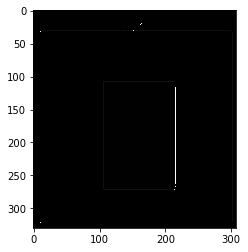

In [7]:
img = cv2.imread('../../img/box.png',0)
ret,thresh = cv2.threshold(img,127,255,0)
img, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

plt.plot(), plt.imshow(img,cmap = 'gray')
plt.show()

このようにcv2.findContours(image, mode, method[, contours[, hierarchy[, offset]]]) 関数は(少なくとも)3個の引数をとる関数である．第1引数imageは入力画像，第2引数modeは輪郭抽出モード，第3引数methodは輪郭検出方法を指定するフラグである．出力は輪郭画像と輪郭，それに輪郭の階層情報の３つである． 輪郭 とは検出された全輪郭をPythonのlistとして出力するもので、list内の各輪郭は輪郭上の点の(x,y)座標をNumpyのarrayとして保存されている．

Note 第２引数と第３引数及び輪郭の階層情報については後述する．それまではサンプルコードで指定しているフラグや値を使えば輪郭がうまく検出できると思っておこう．


## 輪郭を描画する方法

検出した輪郭を描画するには cv2.drawContours(image, contours, contourIdx, color[, thickness[, lineType[, hierarchy[, maxLevel[, offset]]]]]) 関数を使う．この関数は境界上に点を持つ形状であれば，輪郭以外の形状の描画にも使える．第1引数imageは入力画像，第2引数contoursはPythonのlistとして保存されている輪郭，第3引数contourIdxは描画したい輪郭のインデックス(第2引数で与えた輪郭のlistから一つの輪郭だけを描画したいとき、輪郭の指定に使う．全輪郭を描画する時はー1を指定する．)，以降の引数は輪郭を描画する色(color)や線の太さ(thickness)といった情報である．

画像中の全輪郭を描画するには:



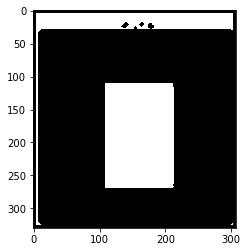

In [8]:
img = cv2.imread('../../img/box.png',0)
ret,thresh = cv2.threshold(img,127,255,0)
img, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
img = cv2.drawContours(img, contours, -1, (0,255,0), 3)

plt.plot(), plt.imshow(img,cmap = 'gray')
plt.show()

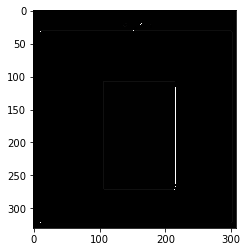

In [9]:
img = cv2.imread('../../img/box.png',0)
ret,thresh = cv2.threshold(img,127,255,0)
img, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
img = cv2.drawContours(img, contours, 3, (0,255,0), 3)

plt.plot(), plt.imshow(img,cmap = 'gray')
plt.show()

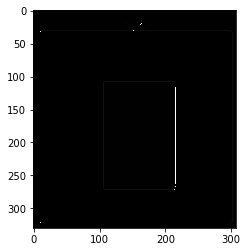

In [10]:
img = cv2.imread('../../img/box.png',0)
ret,thresh = cv2.threshold(img,127,255,0)
img, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[4]
img = cv2.drawContours(img, [cnt], 0, (0,255,0), 3)

plt.plot(), plt.imshow(img,cmap = 'gray')
plt.show()

Note 2番目と3番目の描画方法は同じように見えるが，後で3番目の方法が便利だと分かるようになるだろう．

## 輪郭の近似方法

これは cv2.findContours(image, mode, method[, contours[, hierarchy[, offset]]]) 関数の第3引数methodのことであるが，具体的に何を指しているのだろうか?

前述したように，輪郭とは同じ値を持つ形状の境界を指し，境界線上の点の(x,y)座標をデータとして格納している．しかし，本当に全ての点の座標を保存しているだろうか？これがmethodで指定されることなのである．

methoの値として cv2.CHAIN_APPROX_NONE を指定すれば輪郭上の全点の情報を保持する．しかし，本当に全点の情報が必要なのだろうか？例えば，直線の輪郭を検出したとして，検出した線を表現するのに境界上の全ての点の情報を保持する必要があるだろうか。直線ならば，その直線の端点のみを保持するだけで十分のはずである．かくして、cv2.CHAIN_APPROX_SIMPLEを指定すれば，輪郭を圧縮して冗長な点の情報を削除し，メモリの使用を抑えることができる．

次の例では長方形が描いてある画像に対し近似した輪郭の検出を行ったものである．arrayとして保存している輪郭内の全点を青い円で描画している．左の画像は cv2.CHAIN_APPROX_NONE フラグを指定し、検出した点は(734個)である。右の画像は cv2.CHAIN_APPROX_SIMPLE フラグを指定し、検出した点はたったの4個である．これで近似方法の指定によって、どれだけメモリ消費を抑えられるかお分かりになるだろう!

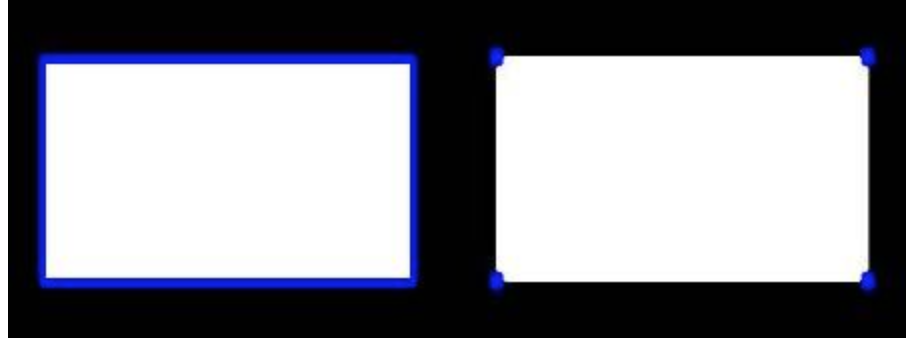

# 領域(輪郭)の特徴

## 1. モーメント

画像のモーメントは物体の重心，面積などを計算するのに役立つ．詳細についてはWikipediaの 画像モーメント のページを参照せよ．

cv2.moments(array[, binaryImage])) 関数は3次までのモーメントをすべて計算し、辞書形式の値を返す (コード, 注意: OpenCV2では返す値が違うためエラーになる):



In [12]:
img = cv2.imread('../../img/box.png',0)
ret,thresh = cv2.threshold(img,127,255,0)
imgEdge,contours,hierarchy = cv2.findContours(thresh, 1, 2)

cnt = contours[0]
M = cv2.moments(cnt)
print(M)

{'mu20': 18037803.661748707, 'm20': 482210384.3333333, 'mu30': 36279.825592041016, 'nu03': -2.4345201490984027e-06, 'mu21': 145202.9175710678, 'm10': 2883767.6666666665, 'm03': 144446487790.35, 'nu30': 8.444278653187849e-07, 'm12': 109937857445.31667, 'mu12': -2731211.864593506, 'nu02': 0.12341165666985543, 'm00': 17916.0, 'nu20': 0.05619550105395193, 'm30': 83423589797.70001, 'm02': 683008693.8333333, 'nu12': -6.357007970451725e-05, 'm11': 546494119.75, 'nu11': 2.624322189930081e-05, 'mu11': 8423.629564523697, 'm01': 3395154.833333333, 'nu21': 3.379657639520045e-06, 'mu02': 39613050.70391297, 'mu03': -104596.22430419922, 'm21': 91383685090.95}


In [13]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

In [14]:
print(cx)
print(cy)

160
189


## 2. 面積(Contour area)

領域が占める面積を計算するには cv2.contourArea(contour[, oriented]) 関数を使うか，モーメントの結果をMとして M[‘m00’] で求める.

In [15]:
img = cv2.imread('../../img/box.png',0)
ret,thresh = cv2.threshold(img,127,255,0)
imgEdge,contours,hierarchy = cv2.findContours(thresh, 1, 2)

cnt = contours[0]
area = cv2.contourArea(cnt)
print(area)

17916.0


## 3. 周囲長(arc length)

領域を囲む周囲長(もしくは長さ)は cv2.arcLength(curve, closed) 関数を使って計算できます．第2引数closedは対象とする領域(輪郭)が閉じている(True を指定)か単なる曲線かを表すフラグである．

In [16]:
img = cv2.imread('../../img/box.png',0)
ret,thresh = cv2.threshold(img,127,255,0)
imgEdge,contours,hierarchy = cv2.findContours(thresh, 1, 2)

cnt = contours[0]
perimeter = cv2.arcLength(cnt,True)
print(perimeter)

544.4852812290192


## 4. 輪郭の近似

複雑な形状をした輪郭を，より少ない数の点で単純な形状によって近似する．ここで近似する点の数はユーザが指定する．この関数は Douglas-Peucker algorithm を実装したものである．アルゴリズムの詳細についてはWikipediaのページを参照すること．

輪郭の近似について理解するため、例を使って説明しよう，今、画像の中から矩形を見つけようとしているとする。ここで何らかの問題が生じたため、きちんとした形状の矩形が見つからず、 (下の最初の画像のように)“崩れた形” しかないとしよう．ここで cv2.approxPolyDP(curve, epsilon, closed[, approxCurve]) 関数を使ってこの形の近似を行ってみる。ここで第2引数は epsilon と呼ばれ，実際の輪郭と近似輪郭との許容可能な最大距離を表し，いわば近似の精度を表すパラメータである． epsilon を妥当な値に設定する事で，期待に沿った結果が得られる．

In [17]:
img = cv2.imread('../../img/box.png',0)
ret,thresh = cv2.threshold(img,127,255,0)
imgEdge,contours,hierarchy = cv2.findContours(thresh, 1, 2)

cnt = contours[0]
epsilon = 0.1*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)
print(approx)

[[[106 108]]

 [[106 270]]

 [[214 271]]

 [[215 108]]]


以下の画像のうち，二番目の画像の緑の線は epsilon = 弧長の10% と設定したときの近似図形を表し，三番目の画像は epsilon = 弧長の1% と設定したときの近似図形を表す．第3引数は近似曲線が閉じた曲線か否かを表す．(コード, 対象画像)

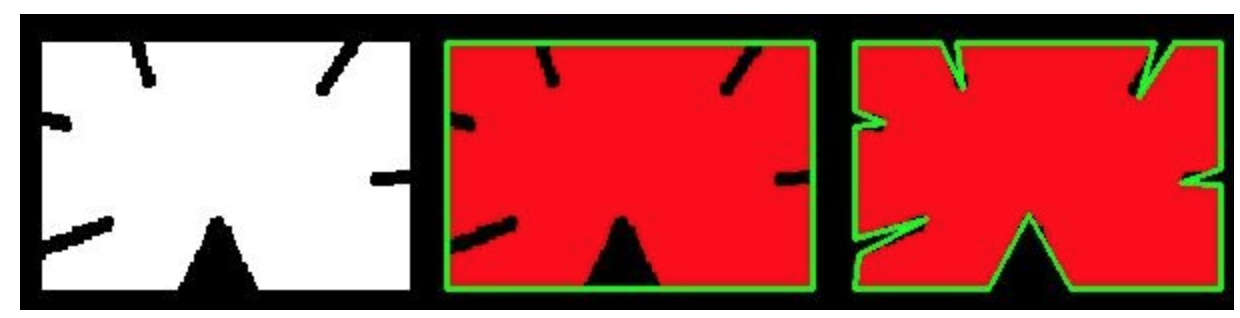

## 5. 凸包(Convex Hull)

凸包(Convex Hull)は輪郭の近似に似ているが，厳密には異なる処理である．
cv2.convexHull(points[, hull[, clockwise[, returnPoints]]]) 関数は曲線の凸性の欠陥を調べ修正する．一般的に言うと，凸性を持つ曲線とは常に突き出るか少なくとも平坦な曲線を指す．内側にへこんでいる部分は凸性の欠陥(convexity defects)と呼ばれる．下の手の画像を例としてしよう．赤い線は手の凸包，両面矢印マークは輪郭から外郭の極大値となる凸性の欠陥を示す．

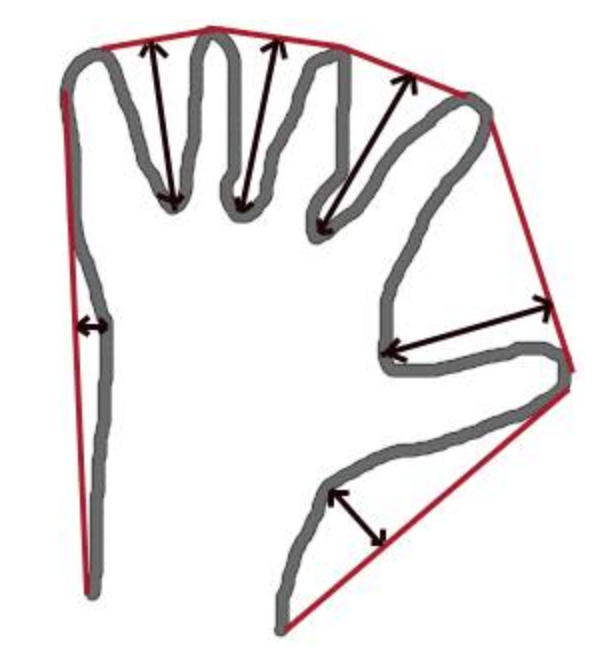

入力引数の詳細:

points :Convex Hullを計算する輪郭．
hull : 出力ですが，普通は引数とはしない(戻り値と同じだから？)．
clockwise : 傾きを表すフラグ． True を指定すると出力のconvex hullは時計回り，そうでなければ反時計回りの形式で出力される．
returnPoints : convex hullの出力する情報を決めるフラグ． True を指定するとconvex hull上の点の座標， False を指定するとconvex hull上の点に対応する輪郭上の点のインデックスを返す．


In [18]:
img = cv2.imread('../../img/box.png',0)
ret,thresh = cv2.threshold(img,127,255,0)
imgEdge,contours,hierarchy = cv2.findContours(thresh, 1, 2)

cnt = contours[0]
hull = cv2.convexHull(cnt)
print(hull)

[[[216 267]]

 [[215 270]]

 [[214 271]]

 [[107 271]]

 [[106 270]]

 [[106 108]]

 [[215 108]]

 [[216 116]]]


もし凸性の欠陥を検出したい場合は returnPoints = False を指定する．その理由を理解してもらうために，上の長方形画像を例に使おう．まず初めに長方形の輪郭を cnt として検出する．この輪郭に対して returnPoints = True を指定したconvex hullを使うと以下のような出力を得る: [[[234 202]], [[ 51 202]], [[ 51 79]], [[234 79]]] これは長方形の4隅の点を指す．次に，全く同じ輪郭に対して returnPoints = False を指定すると以下のような出力になる: [[129],[ 67],[ 0],[142]] ．これは各convex hull上の点に対応する輪郭上の点のインデックスの値になっており，最初の点を確認してみると: cnt[129] = [[234, 202]] となり，フラグを True にした時に得た出力と一致していることが分かる．

凸性の欠陥については後でまた議論する．

## 6. 凸性の確認

曲線の凸性を確認するための関数は cv2.isContourConvex() である．返戻値はTrue か Falseの二値の値である．

In [19]:
img = cv2.imread('../../img/box.png',0)
ret,thresh = cv2.threshold(img,127,255,0)
imgEdge,contours,hierarchy = cv2.findContours(thresh, 1, 2)

cnt = contours[0]
k = cv2.isContourConvex(cnt)

print(k)

False


## 7.a. 外接矩形

単純な長方形であり、物体の回転を仮定していない．そのため外接矩形の面積は最小になる保証はない． これにはcv2.boundingRect() 関数を使う．

外接矩形の左上の位置を(x,y)，横と縦のサイズを(w,h)とすると，以下のようになる．



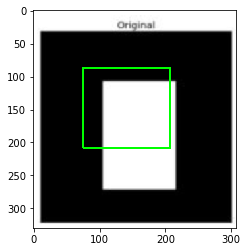

In [35]:
# img = cv2.imread('../../img/box.png',0)
img = cv2.imread('../../img/box.png')
# ret,thresh = cv2.threshold(img,127,255,0)
# imgEdge,contours,hierarchy = cv2.findContours(thresh, 1, 2)

cnt = contours[0]
x,y,w,h = cv2.boundingRect(cnt)
img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

plt.plot(), plt.imshow(img,cmap = 'gray')
plt.show()

## 7.b. 回転を考慮した外接矩形

もう一つの外接矩形は回転を考慮したものである． cv2.minAreaRect() を使う．戻り値は Box2D の構造(左上の点(x,y)，横と縦のサイズ(width, height)，回転角)であるが、この長方形を描画する時に必要な情報は長方形の4隅の点なので， cv2.boxPoints() 関数を使って計算する．



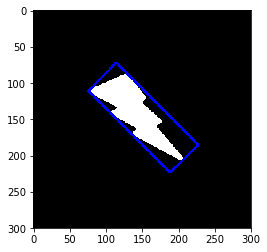

In [39]:
# img = cv2.imread('../../img/target.png',0)
img = cv2.imread('../../img/target.png',0)
ret,thresh = cv2.threshold(img,127,255,0)
imgEdge,contours,hierarchy = cv2.findContours(thresh, 1, 2)

img = cv2.imread('../../img/target.png')
cnt = contours[0]
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
img = cv2.drawContours(img,[box],0,(0,0,255),2)

plt.plot(), plt.imshow(img)
plt.show()

## 8. 最小外接円

物体の最小外接円を計算する時は cv2.minEnclosingCircle() 関数を使います．

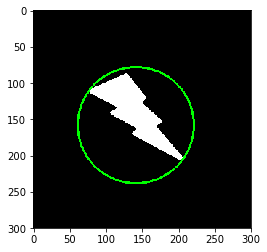

In [40]:
img = cv2.imread('../../img/target.png',0)
ret,thresh = cv2.threshold(img,127,255,0)
imgEdge,contours,hierarchy = cv2.findContours(thresh, 1, 2)

img = cv2.imread('../../img/target.png')

cnt = contours[0]
(x,y),radius = cv2.minEnclosingCircle(cnt)
center = (int(x),int(y))
radius = int(radius)
img = cv2.circle(img,center,radius,(0,255,0),2)

plt.plot(), plt.imshow(img)
plt.show()

## 9. 楕円のフィッティング

物体に楕円をあてはめる時は cv2.fitEllipse 関数を使う．出力は求めた楕円に外接する回転外接矩形になる．

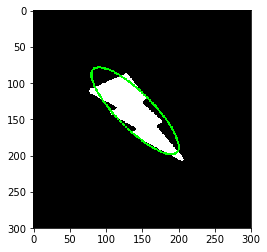

In [41]:
img = cv2.imread('../../img/target.png',0)
ret,thresh = cv2.threshold(img,127,255,0)
imgEdge,contours,hierarchy = cv2.findContours(thresh, 1, 2)

img = cv2.imread('../../img/target.png')
cnt = contours[0]
ellipse = cv2.fitEllipse(cnt)
img = cv2.ellipse(img,ellipse,(0,255,0),2)

plt.plot(), plt.imshow(img)
plt.show()

## 10. 直線のフィッティング

楕円フィッティングと同様に，点の集合に対して直線のあてはめも可能である．それには cv2.fitLine関数を用いる。次の画像は白色の点の集合に対して直線をフィッティングした結果である．

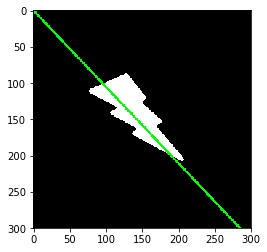

In [42]:
img = cv2.imread('../../img/target.png',0)
ret,thresh = cv2.threshold(img,127,255,0)
imgEdge,contours,hierarchy = cv2.findContours(thresh, 1, 2)

img = cv2.imread('../../img/target.png')

cnt = contours[0]
rows,cols = img.shape[:2]
[vx,vy,x,y] = cv2.fitLine(cnt, cv2.DIST_L2,0,0.01,0.01)
lefty = int((-x*vy/vx) + y)
righty = int(((cols-x)*vy/vx)+y)
img = cv2.line(img,(cols-1,righty),(0,lefty),(0,255,0),2)

plt.plot(), plt.imshow(img)
plt.show()

# 領域(輪郭)の属性情報

ここでは物体の特徴を表す時によく使われる輪郭の属性情報(ソリディティ, 等価直径, マスク画像，平均値など)について学ぶ．

(NB : 重心，面積，周囲長なども輪郭の属性情報であるが，これらについては前のチュートリアルで既に扱った)



## 1. アスペクト比(Aspect Ratio)

アスペクト比とは、物体を囲む外接長方形の縦幅(height)に対する横幅(width)の比のことである．



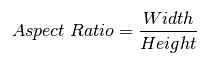

In [3]:
img = cv2.imread('../../img/target.png',0)
ret,thresh = cv2.threshold(img,127,255,0)
imgEdge,contours,hierarchy = cv2.findContours(thresh, 1, 2)

img = cv2.imread('../../img/target.png')
cnt = contours[0]
x,y,w,h = cv2.boundingRect(cnt)
aspect_ratio = float(w)/h

print(aspect_ratio)

1.0909090909090908


## 2. エクステント(Extent)

エクステントとは外接矩形の面積に対する輪郭が占める面積の比のことである．

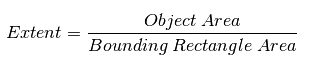

In [6]:
img = cv2.imread('../../img/target.png',0)
ret,thresh = cv2.threshold(img,127,255,0)
imgEdge,contours,hierarchy = cv2.findContours(thresh, 1, 2)

img = cv2.imread('../../img/target.png')
cnt = contours[0]
area = cv2.contourArea(cnt)
x,y,w,h = cv2.boundingRect(cnt)
rect_area = w*h
extent = float(area)/rect_area

print(extent)


0.29611194590533435


## 3. ソリディティ(Solidity)

ソリディティとは凸包(領域を囲む最小の外接多角形)の面積に対する輪郭の面積の比のことをいう．

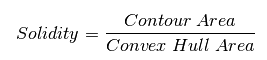

In [5]:
img = cv2.imread('../../img/target.png',0)
ret,thresh = cv2.threshold(img,127,255,0)
imgEdge,contours,hierarchy = cv2.findContours(thresh, 1, 2)

img = cv2.imread('../../img/target.png')
cnt = contours[0]
area = cv2.contourArea(cnt)
hull = cv2.convexHull(cnt)
hull_area = cv2.contourArea(hull)
solidity = float(area)/hull_area


print(solidity)


0.8308300395256917


## 4. 等価直径(Equivalent Diameter)

等価直径とは、輪郭の面積と同じ面積を持つ円の直径のことをいう．



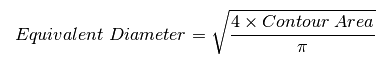

In [9]:
img = cv2.imread('../../img/target.png',0)
ret,thresh = cv2.threshold(img,127,255,0)
imgEdge,contours,hierarchy = cv2.findContours(thresh, 1, 2)

img = cv2.imread('../../img/target.png')
cnt = contours[0]
area = cv2.contourArea(cnt)
hull = cv2.convexHull(cnt)
hull_area = cv2.contourArea(hull)
solidity = float(area)/hull_area


print(solidity)


0.8308300395256917


## 5. 傾き(Orientation)

傾きとは物体が向いている方向を意味する．以下の計算方法で長径(MA: Major Axis)と短径(ma: Minor Axis)も同時に計算できる．

In [10]:
img = cv2.imread('../../img/target.png',0)
ret,thresh = cv2.threshold(img,127,255,0)
imgEdge,contours,hierarchy = cv2.findContours(thresh, 1, 2)

img = cv2.imread('../../img/target.png')
cnt = contours[0]
(x,y),(MA,ma),angle = cv2.fitEllipse(cnt)

print(MA)
print(ma)


49.31149673461914
162.16934204101562


## 6. マスク(Mask)と画素点(Pixel Points)

マスク(Mask)とは物体が占める領域とそれ以外の領域を区別するためのもの。また画素点(Pixel Point)とはマスクを構成する全ての点を指す．物体を構成する全ての点の情報が必要になる時は，以下のようにする:



In [15]:
img = cv2.imread('../../img/target.png',0)
ret,thresh = cv2.threshold(img,127,255,0)
imgEdge,contours,hierarchy = cv2.findContours(thresh, 1, 2)

img = cv2.imread('../../img/target.png')
cnt = contours[0]
mask = np.zeros(img.shape,np.uint8)
cv2.drawContours(mask,[cnt],0,255,-1)
pixelpoints = np.transpose(np.nonzero(mask))
#pixelpoints = cv2.findNonZero(mask)

print(mask.shape)
print(pixelpoints.shape)

(300, 300, 3)
(4900, 3)


3行目と4行目はそれぞれNumpyの関数とOpenCVの関数を使っているが，全く同じ処理である．結果も同じ結果が得られるが，若干の違いがある．Numpyは座標を (row, column) の形式で出力するのに対し，OpenCVは (x,y) の形式で出力する．そのため，それぞれの結果は置き換えられる．ここで row = x と column = y という関係になる．

## 7. 最大値，最小値とその位置

画像(対象領域)における画素値の最大値，最小値及び対応する画素の位置を調べるには以下のようにする．



In [29]:
img = cv2.imread('../../img/target.png',0)
ret,thresh = cv2.threshold(img,127,255,0)
imgEdge,contours,hierarchy = cv2.findContours(thresh, 1, 2)

img = cv2.imread('../../img/target.png')
cnt = contours[0]
mask = np.zeros(img.shape,np.uint8)
cv2.drawContours(mask,[cnt],0,255,-1)
print(img.shape)
print(mask.shape)

#get error, why?
# min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(img,mask = mask)

# print(min_val)
# print(max_val)

(300, 300, 3)
(300, 300, 3)


## 8. 平均色と平均値

物体の平均色の計算も可能である．グレースケール画像であれば平均値になる．マスクを指定すると，注目領域を対象として計算する．

In [44]:
img = cv2.imread('../../img/target.png',0)
ret,thresh = cv2.threshold(img,127,255,0)
imgEdge,contours,hierarchy = cv2.findContours(thresh, 1, 2)

img = cv2.imread('../../img/target.png')
cnt = contours[0]
mask = np.zeros(img.shape,np.uint8)
print(img.shape)
print(mask.shape)
print(img.dtype)
print(mask.dtype)

# mean_val = cv2.mean(img,mask = mask)
#get error, why?

# print(min_val)
# print(max_val)

(300, 300, 3)
(300, 300, 3)
uint8
uint8


## 9. 端点(Extreme Points)

端点とは物体の上橋(topmost)，下端(bottommost)，右端(rightmost)，左端(leftmost)の点を意味する．

In [46]:
img = cv2.imread('../../img/target.png',0)
ret,thresh = cv2.threshold(img,127,255,0)
imgEdge,contours,hierarchy = cv2.findContours(thresh, 1, 2)

img = cv2.imread('../../img/target.png')
cnt = contours[0]
leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])

print(leftmost)
print(rightmost)
print(topmost)
print(bottommost)

(76, 111)
(207, 205)
(127, 87)
(204, 207)


例えばインドの地図に対して端点を求めると，以下のようになる:

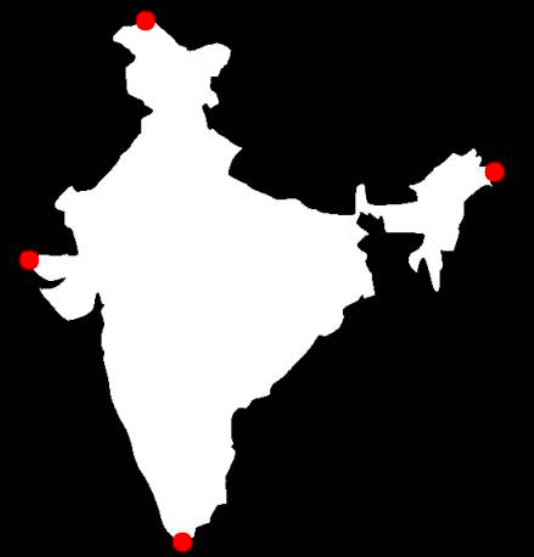